In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [ ]:
%cd /mydrive/community_detection/

/content/gdrive/My Drive/community_detection


In [ ]:
!cp LinkedIn\ company\ information\ datasets\ \(Public\ web\ data\).csv company.csv

In [ ]:
!cp LinkedIn\ people\ profiles\ datasets.csv people.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
df = pd.read_csv('people.csv')

In [ ]:
len(df.columns)

26

In [ ]:
len(df)

1000

In [ ]:
df.head()

,timestamp,id,name,city,country_code,region,current_company:company_id,current_company:name,position,following,...,people_also_viewed,educations_details,education,avatar,languages,certifications,recommendations,recommendations_count,volunteer_experience,сourses
0,2023-01-10,catherinemcilkenny,"Catherine Fitzpatrick (McIlkenny), B.A",Canada,CA,NaN,NaN,NaN,Snr Business Analyst at Emploi et Développemen...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/l...",Queen's University Belfast,"[{""degree"":""Bachelor of Arts (B.A.) Honours"",""...",https://media.licdn.com/dms/image/C4E03AQEcz_j...,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-17,margot-bon-51a04624,Margot Bon,"The Randstad, Netherlands",NL,EU,gemeente-utrecht,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,NaN,...,"[{""profile_link"":""https://nl.linkedin.com/in/j...",NaN,"[{""degree"":""Scrum en Agile werken"",""end_year"":...",https://static.licdn.com/sc/h/244xhbkr7g40x6bs...,"[{""subtitle"":""Professional working proficiency...","[{""meta"":""Issued Jun 2013"",""subtitle"":""Van der...",Menno H. Poort “Ik werk al jaren prettig met M...,2.0,"[{""cause"":"""",""duration"":""Sep 2010 Jul 2020 9 y...",NaN
2,2023-05-17,mike-dean-8509a193,Mike Dean,"England, United Kingdom",UK,NaN,network-rail,Network Rail,Network Data Manager at Network Rail,NaN,...,"[{""profile_link"":""https://uk.linkedin.com/in/g...",Brighton Polytechnic,"[{""degree"":""2:2"",""end_year"":""1991"",""field"":""El...",https://media.licdn.com/dms/image/C4D03AQHLj-Z...,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-29,giovanna-panarella-99a0a4167,Giovanna Panarella,"Avellino, Campania, Italy",IT,EU,NaN,Freelance,Architetto (Freelance),500.0,...,"[{""profile_link"":""https://it.linkedin.com/in/e...",Università di Camerino,"[{""degree"":""“Corso di aggiornamento profession...",https://media-exp1.licdn.com/dms/image/C4D03AQ...,NaN,NaN,NaN,NaN,"[{""cause"":""Arts and Culture"",""duration"":""Jan 2...",NaN
4,2022-12-06,steve-latimer-3364327,Steve Latimer,"Ontario, Canada",CA,NaN,mid-range-computer-group-inc.,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/d...",St. Michael's College School,"[{""degree"":"""",""end_year"":""1978"",""field"":"""",""me...",NaN,NaN,"[{""meta"":""Issued Jan 2022 See credential"",""sub...","Blake Reeves “If I was a customer, I would wan...",1.0,NaN,NaN


<Axes: >

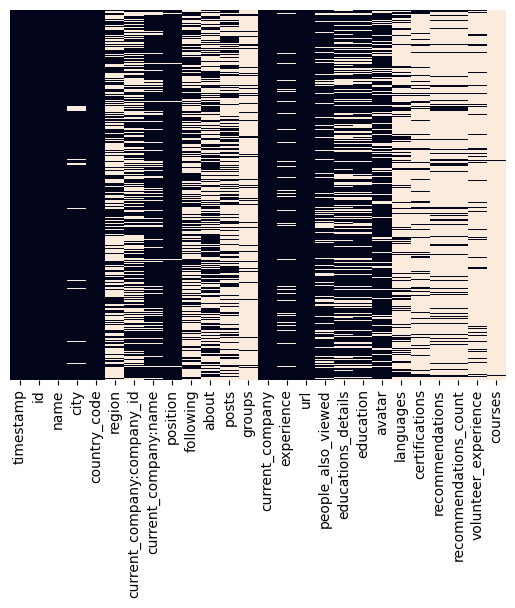

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
columns = df.columns
print(columns)

Index(['timestamp', 'id', 'name', 'city', 'country_code', 'region',
       'current_company:company_id', 'current_company:name', 'position',
       'following', 'about', 'posts', 'groups', 'current_company',
       'experience', 'url', 'people_also_viewed', 'educations_details',
       'education', 'avatar', 'languages', 'certifications', 'recommendations',
       'recommendations_count', 'volunteer_experience', 'сourses'],
      dtype='object')


In [ ]:
df.drop(['id','timestamp','posts','avatar','region','current_company:company_id'
,'following','groups','people_also_viewed','recommendations','recommendations_count','url',
         'current_company','about','educations_details','volunteer_experience'],axis=1,inplace=True)

In [ ]:
df = df.dropna(subset=['city','country_code'])

In [ ]:
df.head()

,name,city,country_code,current_company:name,position,experience,education,languages,certifications,сourses
0,"Catherine Fitzpatrick (McIlkenny), B.A",Canada,CA,NaN,Snr Business Analyst at Emploi et Développemen...,NaN,"[{""degree"":""Bachelor of Arts (B.A.) Honours"",""...",NaN,NaN,NaN
1,Margot Bon,"The Randstad, Netherlands",NL,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,"[{""company"":""Gemeente Utrecht"",""company_id"":""g...","[{""degree"":""Scrum en Agile werken"",""end_year"":...","[{""subtitle"":""Professional working proficiency...","[{""meta"":""Issued Jun 2013"",""subtitle"":""Van der...",NaN
2,Mike Dean,"England, United Kingdom",UK,Network Rail,Network Data Manager at Network Rail,"[{""company"":""Network Rail"",""company_id"":""netwo...","[{""degree"":""2:2"",""end_year"":""1991"",""field"":""El...",NaN,NaN,NaN
3,Giovanna Panarella,"Avellino, Campania, Italy",IT,Freelance,Architetto (Freelance),"[{""company"":""Freelance"",""company_id"":null,""loc...","[{""degree"":""“Corso di aggiornamento profession...",NaN,NaN,NaN
4,Steve Latimer,"Ontario, Canada",CA,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,"[{""company"":""Mid-Range Computer Group Inc."",""c...","[{""degree"":"""",""end_year"":""1978"",""field"":"""",""me...",NaN,"[{""meta"":""Issued Jan 2022 See credential"",""sub...",NaN


In [ ]:
df['experience'][1]

'[{"company":"Gemeente Utrecht","company_id":"gemeente-utrecht","industry":"Government Administration","location":"Utrecht, Netherlands","positions":[{"description":"Bijdragen aan de positionering en profilering van Gemeente Utrecht als stad van Gezond Stedelijk Leven voor Iedereen. Verder ontwikkelen Corporate Communicatie (afdeling) en Corporate Story. Opzetten en uitvoeren van (interne) communicatiestrategie, plan en middelen. Versterken communicatiekracht van de organisatie. Communicatieadviseur voor interne- en corporate projecten o.a. Arbeidsmarkt Campagne, nieuw intranet, talkshow Studio030, DUS, De Utrechtse Standaard Bijdragen aan de positionering en profilering van Gemeente Utrecht als stad van Gezond Stedelijk Leven voor Iedereen. Verder ontwikkelen Corporate Communicatie (afdeling) en Corporate Story. Opzetten en uitvoeren van (interne) communicatiestrategie, plan en middelen. Versterken communicatiekracht van de organisatie. Communicatieadviseur voor interne- en corporate 

In [ ]:
df['current_company:name'].fillna('Unemployed', inplace=True)
df['position'].fillna('Unemployed', inplace=True)
df.experience.fillna("",inplace=True)

In [ ]:
# experience = [ {'company':'Google', 'positions' : [  {'title':'SDE', 'duration_short': '3 yrs'},  {}  ]    } , {}, {}, {}]
# res = [ {'company':'','position':'', 'duration':'' }, {'company':'google','position':'SDE', 'duration':'3 yrs'  }, { } ]

In [ ]:
def experience_filter(experience):
  if experience is not None and experience != "":
    items = json.loads(experience)
    tot_companies = []
    for company in items:
      company_dict = {}
      for k,value in company.items():
        if k == 'company':
          company_dict[k] = value
        elif k == 'positions':
          if 'title' in value[0]:
            company_dict['position'] = value[0]['title']
            if 'duration_short' in value[0]:
              company_dict['duration'] = value[0]['duration_short']
            else:
              company_dict['duration'] = 'NA'
          else:
            company_dict['position'] = 'NA'
      tot_companies.append(company_dict)
      return tot_companies
  else:
    return []

df['experience'] = df['experience'].apply(lambda x: experience_filter(x) if pd.notnull(x) else x)

In [ ]:
df.experience[1]

[{'company': 'Gemeente Utrecht',
  'position': 'Communicatieadviseur Corporate & Strategie',
  'duration': '8 months'}]

In [ ]:
def education_filter(education):
  if education is not None:
    items = json.loads(education)
    tot_education = []
    for education in items:
      education_dict = {}
      for k,value in education.items():
        if k == 'degree':
          education_dict[k] = value
        elif k == 'field':
            education_dict['skills'] = value
      tot_education.append(education_dict)
    return tot_education
  else:
    return []

df['education'] = df['education'].apply(lambda x: education_filter(x) if pd.notnull(x) else x)

In [ ]:
df.education[1]

[{'degree': 'Scrum en Agile werken', 'skills': ''},
 {'degree': 'Basiscursus', 'skills': 'NT1 en NT2'},
 {'degree': 'Persoonlijke effectiviteit & Verandermanagement', 'skills': ''},
 {'degree': "Bachelor's degree", 'skills': 'Senior Communicatieprofessional'},
 {'degree': 'Bachelor', 'skills': 'Marketing, Communication, Design'},
 {'degree': 'VWO',
  'skills': 'English, French, Dutch, German, Art, History, Math and Economics'}]

In [ ]:
def language_filter(language):
  if language is not None:
    items = json.loads(language)
    tot_langugae = []
    for language in items:
      for k,value in language.items():
        if k == 'title':
          tot_langugae.append(value)
    return tot_langugae
  else:
    return []

df['languages'] = df['languages'].apply(lambda x: language_filter(x) if pd.notnull(x) else x)

In [ ]:
df.languages[1]

['English', 'German', 'French', 'Dutch']

In [ ]:
def certification_filter(certification):
  if certification is not None:
    items = json.loads(certification)
    tot_certificates = []
    for certification in items:
      for k,value in certification.items():
        if k == 'title':
          tot_certificates.append(value)
    return tot_certificates
  else:
    return []

df['certifications'] = df['certifications'].apply(lambda x: certification_filter(x) if pd.notnull(x) else x)

In [ ]:
df.certifications[1]

['Senior Communicatieprofessional C (BNP4)']

In [ ]:
def courses_filter(courses):
  if courses is not None:
    items = json.loads(courses)
    tot_courses = []
    for courses in items:
      for k,value in courses.items():
        if k == 'title':
          tot_courses.append(value)
    return tot_courses
  else:
    return []

df['сourses'] = df['сourses'].apply(lambda x: courses_filter(x) if pd.notnull(x) else x)

In [ ]:
df['сourses'][24]

['Masters work in Computer Architecture']

In [ ]:
len(df)

947

In [ ]:
len(df.columns)

11

<Axes: >

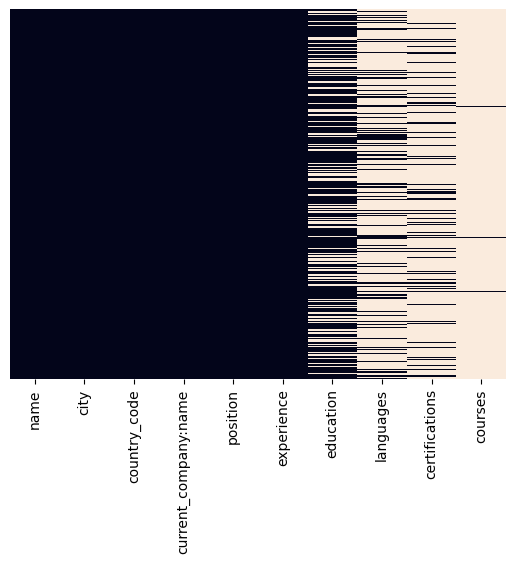

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.head()

,name,city,country_code,current_company:name,position,experience,education,languages,certifications,сourses
0,"Catherine Fitzpatrick (McIlkenny), B.A",Canada,CA,Unemployed,Snr Business Analyst at Emploi et Développemen...,[],"[{'degree': 'Bachelor of Arts (B.A.) Honours',...",NaN,NaN,NaN
1,Margot Bon,"The Randstad, Netherlands",NL,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,"[{'company': 'Gemeente Utrecht', 'position': '...","[{'degree': 'Scrum en Agile werken', 'skills':...","[English, German, French, Dutch]",[Senior Communicatieprofessional C (BNP4)],NaN
2,Mike Dean,"England, United Kingdom",UK,Network Rail,Network Data Manager at Network Rail,"[{'company': 'Network Rail', 'position': 'Netw...","[{'degree': '2:2', 'skills': 'Electronic Engin...",NaN,NaN,NaN
3,Giovanna Panarella,"Avellino, Campania, Italy",IT,Freelance,Architetto (Freelance),"[{'company': 'Freelance', 'position': 'Archite...",[{'degree': '“Corso di aggiornamento professio...,NaN,NaN,NaN
4,Steve Latimer,"Ontario, Canada",CA,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,"[{'company': 'Mid-Range Computer Group Inc.', ...","[{'degree': '', 'skills': ''}, {'degree': 'Uni...",NaN,[IBM Power Systems Enterprise Linux Technical ...,NaN


In [ ]:
print(f'Language : {df.languages[1]}')
print(f'Experience : {df.experience[1]}')
print(f'Certs : {df.certifications[1]}')
print(f'Courses : {df["сourses"][24]}')

Language : ['English', 'German', 'French', 'Dutch']
Experience : [{'company': 'Gemeente Utrecht', 'position': 'Communicatieadviseur Corporate & Strategie', 'duration': '8 months'}]
Certs : ['Senior Communicatieprofessional C (BNP4)']
Courses : ['Masters work in Computer Architecture']


<ipython-input-49-a2ea0b85cedf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


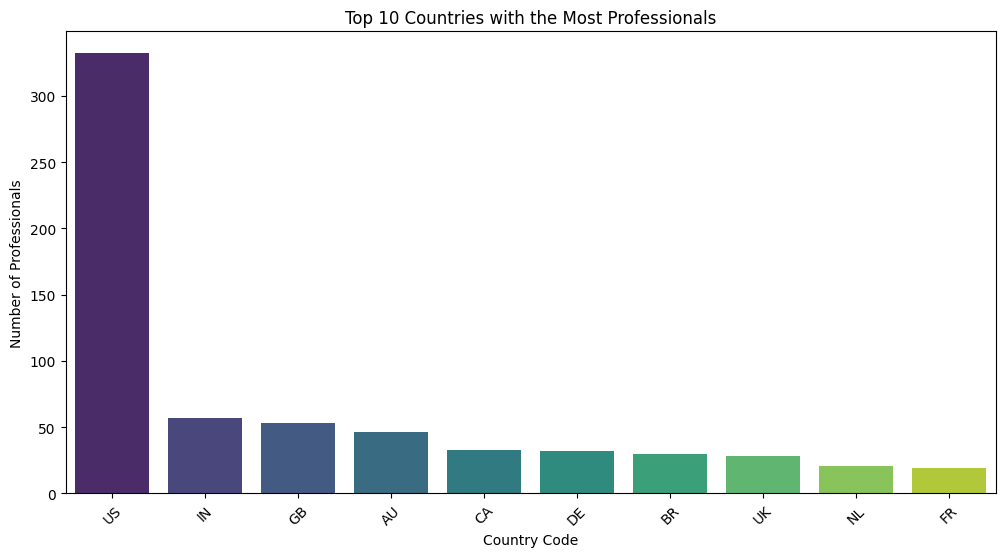

In [ ]:
df_country = df.dropna(subset=['country_code'])

# Get the top 10 countries with the most professionals
top_countries = df_country['country_code'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with the Most Professionals')
plt.xlabel('Country Code')
plt.ylabel('Number of Professionals')
plt.xticks(rotation=45)
plt.show()

<ipython-input-50-69f12eecfdeb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, palette='viridis')


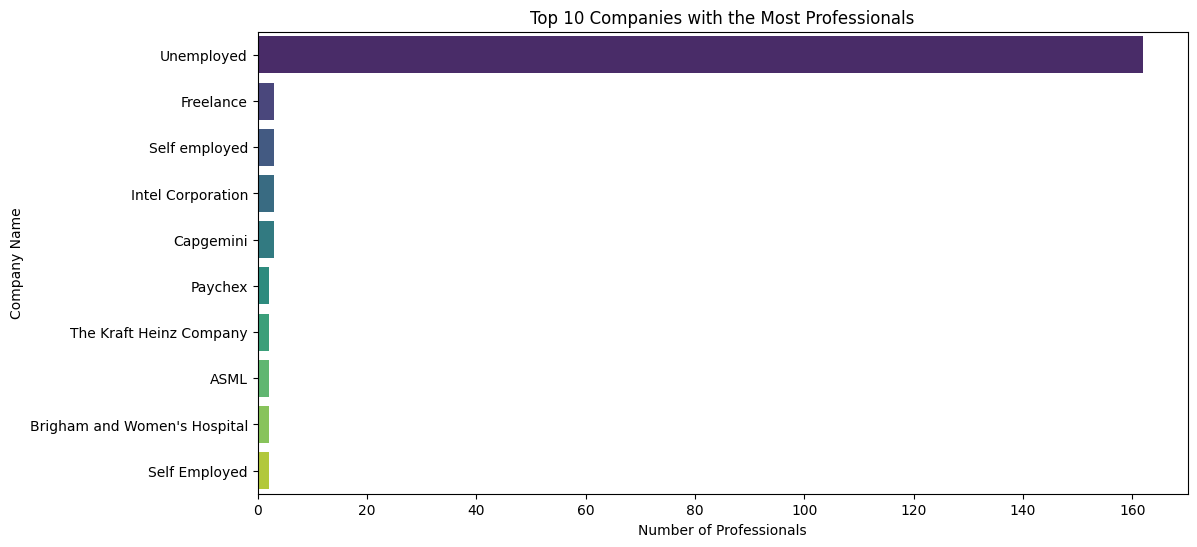

In [ ]:
df_company = df.dropna(subset=['current_company:name'])

# Get the top 10 companies with the most professionals
top_companies = df_company['current_company:name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_companies.index, x=top_companies.values, palette='viridis')
plt.title('Top 10 Companies with the Most Professionals')
plt.xlabel('Number of Professionals')
plt.ylabel('Company Name')
plt.show()